In [ ]:
%pip install scipy matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


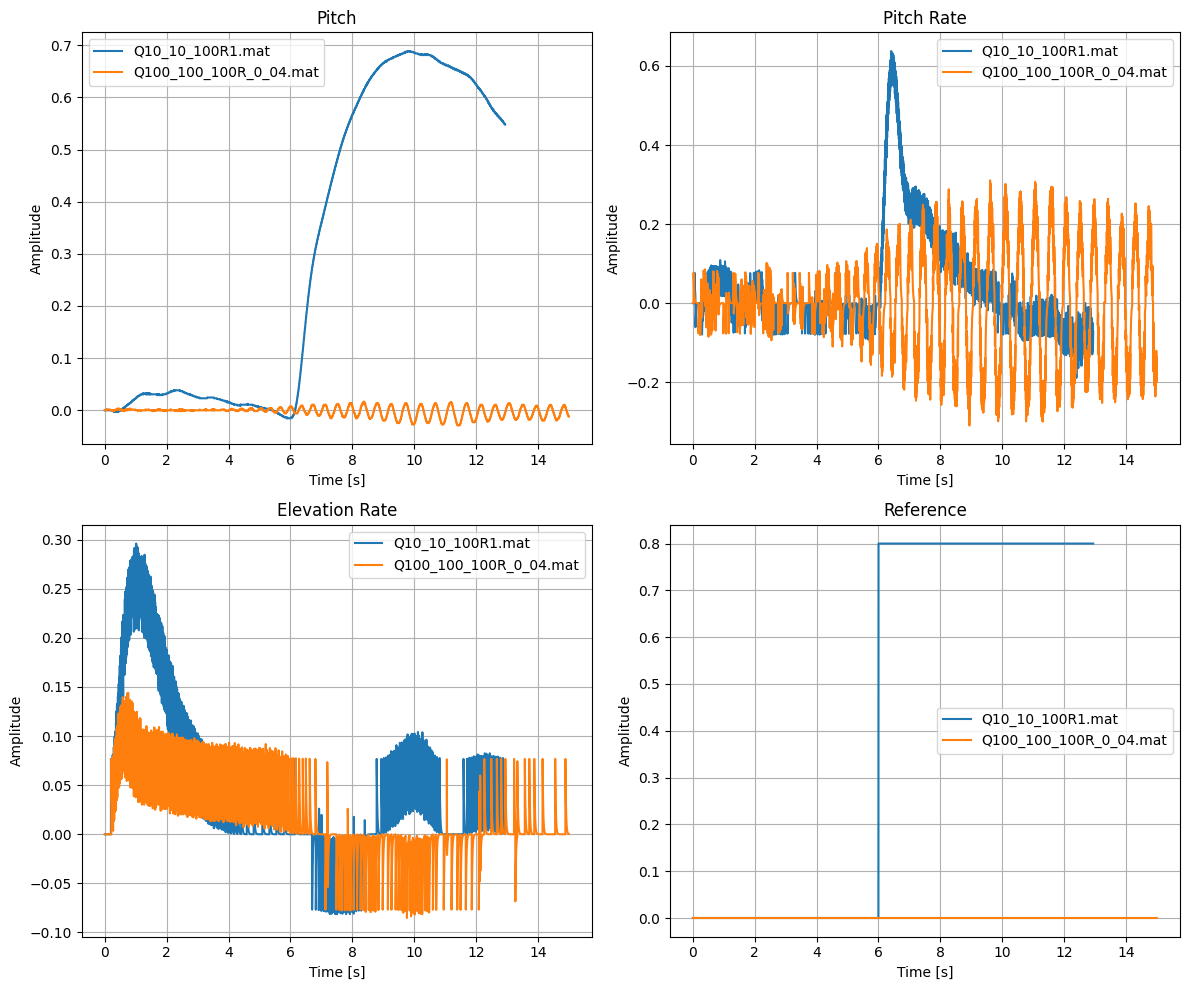

In [13]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

FILE_NAME1 = 'Q10_10_100R1.mat'
# FILE_NAME2 = 'Q100R1.mat'#Dette ble en feilet
FILE_NAME3 = 'Q100_100_100R_0_04.mat' 

FILE_LIST = [FILE_NAME1, FILE_NAME3]

# Set time window
t_min = 0
t_max = 15

# Set up the plots only once
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
labels = ['Time', 'Pitch', 'Pitch Rate', 'Elevation Rate', 'Reference', '?1', '?2', '?3']

# Loop over all files
for fidx, FILE_NAME in enumerate(FILE_LIST):
    data = scipy.io.loadmat(FILE_NAME)
    signal_data = data["ans"]
    time = signal_data[0, :]

    # Mask time
    mask = (time >= t_min) & (time <= t_max)
    time_cropped = time[mask]

    # Plot signals 1–4 on the same axes for all files
    for i in range(1, 5):   # skip time index 0
        ax_idx = i - 1
        ax = axes[ax_idx // 2, ax_idx % 2]

        signal_cropped = signal_data[i, mask]

        # Add label per file
        ax.plot(time_cropped, signal_cropped, label=FILE_NAME)

        ax.set_title(labels[i])
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("Amplitude")
        ax.grid(True)

# Add legends to each subplot
for ax_row in axes:
    for ax in ax_row:
        ax.legend()

plt.tight_layout()
plt.show()




Variables in the .mat file:
- ans: shape (8, 6473)


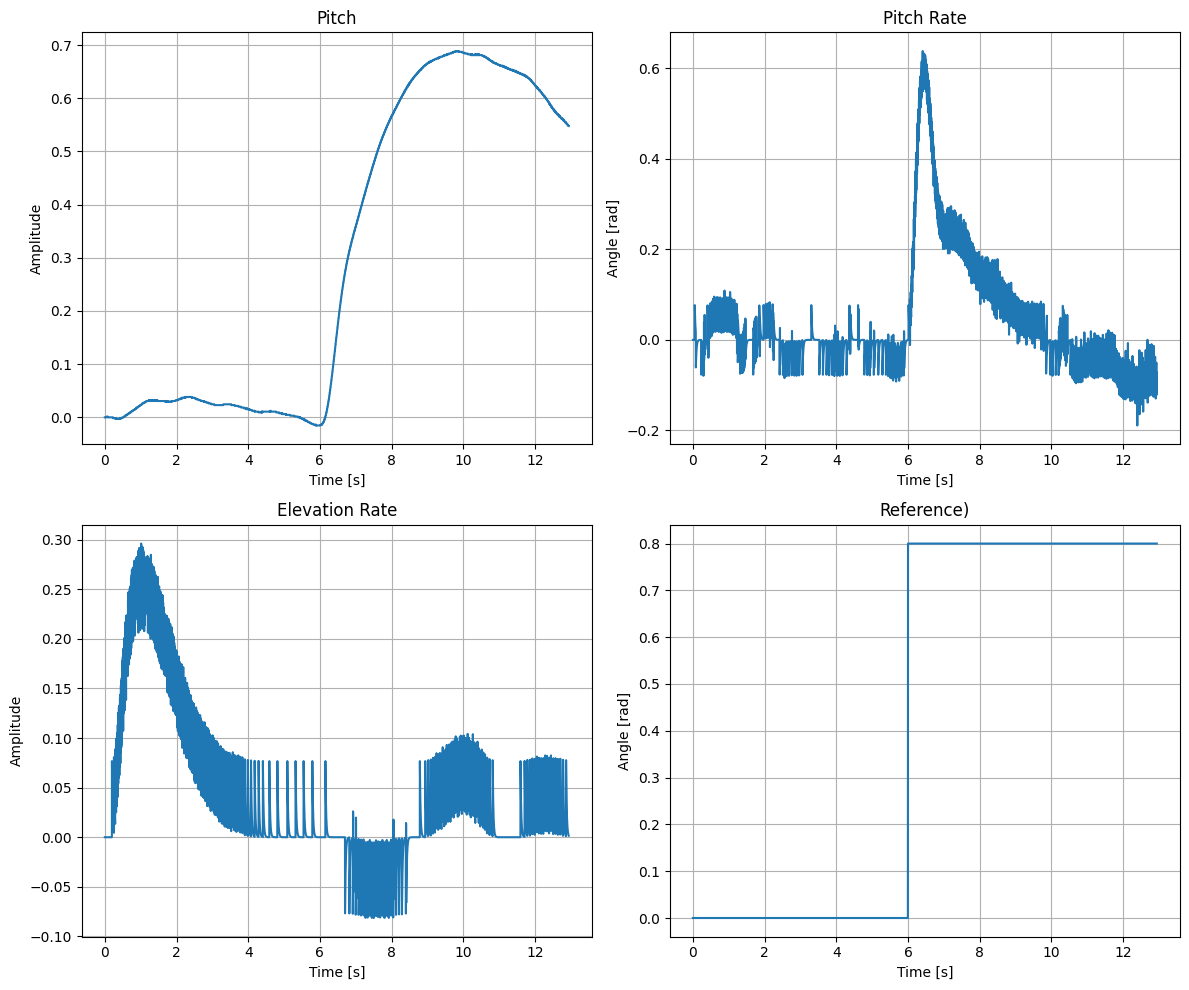

In [ ]:
# Load the MATLAB file
data = scipy.io.loadmat(FILE_NAME1)

# Display the keys to see what variables are in the file
print("Variables in the .mat file:")
for key in data.keys():
    if not key.startswith('__'):
        print(f"- {key}: shape {data[key].shape if hasattr(data[key], 'shape') else type(data[key])}")

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Extract the data
signal_data = data['ans']

# Plot each row as a separate signal
labels = ['Time', 'Pitch', 'Pitch Rate', 'Elevation Rate', 'Reference)', '?1', '?2', '?3']

for i in range(5):
    if i == 0:
        # Skip time for individual plots, we'll use it as x-axis
        continue
    
    ax_idx = i - 1
    ax = axes[ax_idx // 2, ax_idx % 2]
    
    # Use time as x-axis if available
    time = signal_data[0, :]
    signal = signal_data[i, :]
    
    ax.plot(time, signal)
    ax.set_title(labels[i])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Angle [rad]' if i in [2, 4] else 'Amplitude')
    ax.grid(True)

plt.tight_layout()
plt.show()

Variables in the .mat file:
- ans: shape (8, 31828)


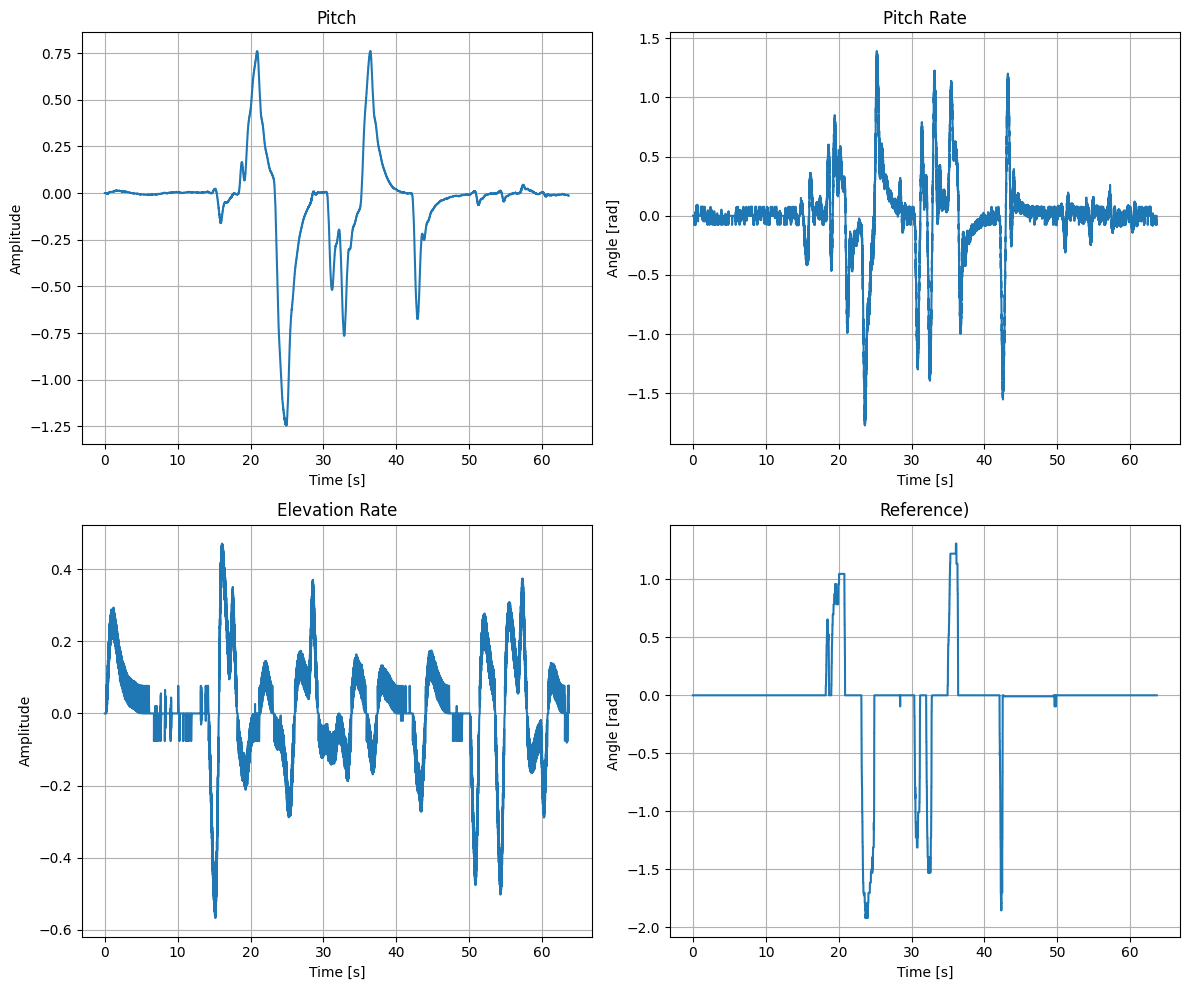

In [7]:
# Load the MATLAB file
data = scipy.io.loadmat(FILE_NAME2)

# Display the keys to see what variables are in the file
print("Variables in the .mat file:")
for key in data.keys():
    if not key.startswith('__'):
        print(f"- {key}: shape {data[key].shape if hasattr(data[key], 'shape') else type(data[key])}")

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Extract the data
signal_data = data['ans']

# Plot each row as a separate signal
labels = ['Time', 'Pitch', 'Pitch Rate', 'Elevation Rate', 'Reference)', '?1', '?2', '?3']

for i in range(5):
    if i == 0:
        # Skip time for individual plots, we'll use it as x-axis
        continue
    
    ax_idx = i - 1
    ax = axes[ax_idx // 2, ax_idx % 2]
    
    # Use time as x-axis if available
    time = signal_data[0, :]
    signal = signal_data[i, :]
    
    ax.plot(time, signal)
    ax.set_title(labels[i])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Angle [rad]' if i in [2, 4] else 'Amplitude')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Export the figure
import os

# Create figures directory if it doesn't exist
figures_dir = './figures'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Save the figure
fig.savefig(f'{figures_dir}/{FILE_NAME}.png', dpi=300, bbox_inches='tight')
print(f"Figure saved to {figures_dir}/{FILE_NAME}.png")

Figure saved to ./figures/minus2minus5.mat.png
